In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.9.2'

In [3]:
df = pd.read_csv('new_york_data.csv', index_col = 0)

/var/folders/3n/vp5_vxxd66d3_nhm1qw9k_580000gn/T/ipykernel_59811/2076588821.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Unnamed: 0', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.drop(columns = {'_merge','Unnamed: 0'}, inplace = True)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1


In [7]:
df.shape

(29838806, 15)

In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [11]:
df_temp = df[["date", "avgTemp"]].drop_duplicates()

In [12]:
df_temp = df_temp[df_temp['date'].dt.year != 2021]
df_temp.set_index('date', inplace=True)

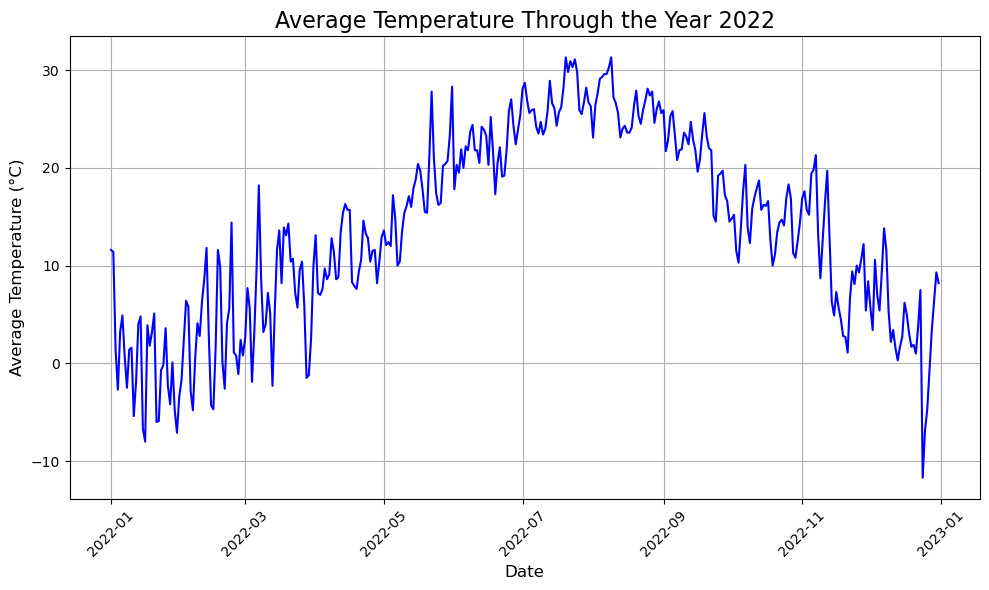

In [13]:


# Sort the dataframe by date to ensure correct plotting
df_temp.sort_index(inplace=True)

# Create the plot
plt.figure(figsize=(10, 6))  # Increase the figure size for better visibility
plt.plot(df_temp.index, df_temp['avgTemp'], linestyle='-', color='b')  # Plot average temperature
plt.title('Average Temperature Through the Year 2022', fontsize=16)  # Add a title
plt.xlabel('Date', fontsize=12)  # Label for the x-axis
plt.ylabel('Average Temperature (°C)', fontsize=12)  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



#### Create a column with the count of trips per day and merge it with the weather dataframe.

In [14]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [15]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [16]:
# Check for any missing values in the date column
print(df_group['date'].isnull().sum())

0


In [17]:
df_2021 = df_group[df_group['date'].dt.year == 2021]
print(df_2021)

         date  ride_id
0  2021-01-30        1
1  2021-02-15        1
2  2021-03-11        1
3  2021-03-14        1
4  2021-03-31        1
5  2021-04-30        1
6  2021-06-04        1
7  2021-07-10        1
8  2021-07-16        1
9  2021-07-19        1
10 2021-07-22        1
11 2021-08-16        1
12 2021-09-05        2
13 2021-09-13        1
14 2021-10-27        1
15 2021-11-07        1
16 2021-11-09        1
17 2021-11-13        3
18 2021-11-16        1
19 2021-11-17        2
20 2021-11-18        1
21 2021-11-21        1
22 2021-11-22        1
23 2021-12-02        1
24 2021-12-04        2
25 2021-12-06        1
26 2021-12-08        1
27 2021-12-11        3
28 2021-12-12        2
29 2021-12-14        1
30 2021-12-19        1
31 2021-12-23        1
32 2021-12-26        3
33 2021-12-28        1
34 2021-12-29        4
35 2021-12-30        9
36 2021-12-31      583


In [18]:
df_group = df_group[df_group['date'].dt.year != 2021]


In [19]:
print(df_group['date'].dt.year.unique())


[2022]


In [20]:
# Step 1: Filter out any data from 2021 in df_group
df_group = df_group[df_group['date'].dt.year != 2021]  # Keep only 2022 data

# Step 2: Print to confirm the unique years left in the data
print(df_group['date'].dt.year.unique())  # This should now only show 2022

# Step 3: Rename 'ride_id' to 'bike_rides_daily' (if necessary)
df_group.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

# Step 4: Merge data on the 'date' column (as done previously)
df = df.merge(df_group, on='date', how='outer', indicator=True)

# Optional: Check the merge result
print(df['_merge'].value_counts(dropna=False))

# Step 5: Filter out rows with '_merge' showing 'left_only' if those are from 2021
# Since you've already filtered for 2022, this step may not be necessary, but you can check
df = df[df['date'].dt.year == 2022]

# Step 6: Set 'date' as the index and print the final columns
df_temp = df.set_index('date')

# Step 7: Check the columns and the head of the final dataframe
print(df_temp.columns)
print(df_temp.head())


[2022]
_merge
both          29838166
left_only          640
right_only           0
Name: count, dtype: int64
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')
                     ride_id  rideable_type               started_at  \
date                                                                   
2022-01-01  D09109AEB47FEEA9   classic_bike  2022-01-01 16:31:02.241   
2022-01-01  ECDFB9C97FAF0F35   classic_bike  2022-01-01 13:38:37.927   
2022-01-01  22F675B5C5A666FD   classic_bike  2022-01-01 00:18:07.680   
2022-01-01  39DBCC00E8BCCFCF   classic_bike  2022-01-01 22:40:32.125   
2022-01-01  FB8B1C38D9B41889  electric_bike  2022-01-01 14:46:57.116   

                           ended_at       start_station_name start_station_id  \
date          

In [21]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,D09109AEB47FEEA9,classic_bike,2022-01-01 16:31:02.241,2022-02-03 20:27:00.358,Picnic Point,4374.01,E 16 St & 5 Ave,6022.04,40.685126,-74.025353,40.737262,-73.992390,casual,11.6,20428.0,both
2022-01-01,ECDFB9C97FAF0F35,classic_bike,2022-01-01 13:38:37.927,2022-01-01 13:45:58.200,W 13 St & 7 Ave,6030.04,Great Jones St,5636.11,40.737815,-73.999947,40.727434,-73.993790,casual,11.6,20428.0,both
2022-01-01,22F675B5C5A666FD,classic_bike,2022-01-01 00:18:07.680,2022-01-01 01:19:41.047,W 42 St & Dyer Ave,6644.07,West St & Chambers St,5329.03,40.758985,-73.993800,40.717548,-74.013221,casual,11.6,20428.0,both
2022-01-01,39DBCC00E8BCCFCF,classic_bike,2022-01-01 22:40:32.125,2022-01-01 22:46:53.380,8 Ave & W 27 St,6297.07,E 31 St & 3 Ave,6239.08,40.747968,-73.996637,40.743943,-73.979661,member,11.6,20428.0,both
2022-01-01,FB8B1C38D9B41889,electric_bike,2022-01-01 14:46:57.116,2022-01-01 14:53:41.673,University Pl & E 14 St,5905.14,E 31 St & 3 Ave,6239.08,40.734814,-73.992085,40.743943,-73.979661,member,11.6,20428.0,both


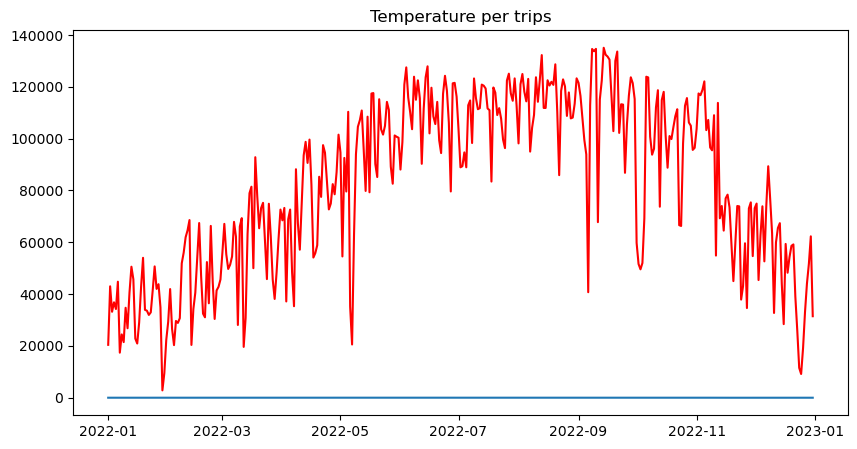

In [22]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'red')
plt.show()

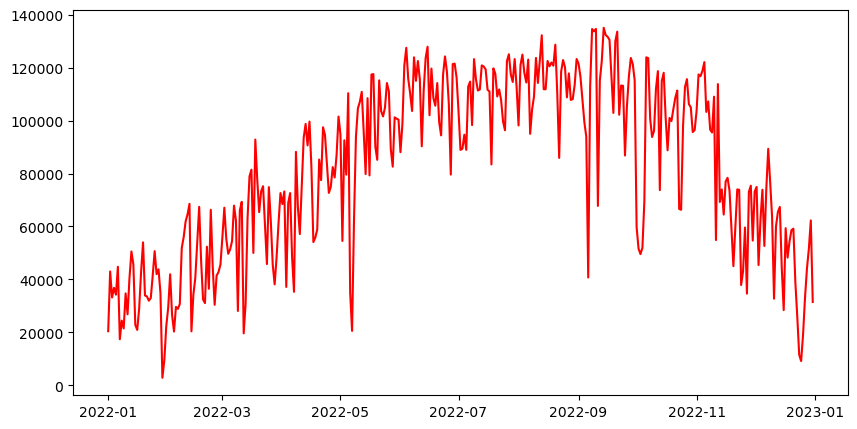

In [23]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

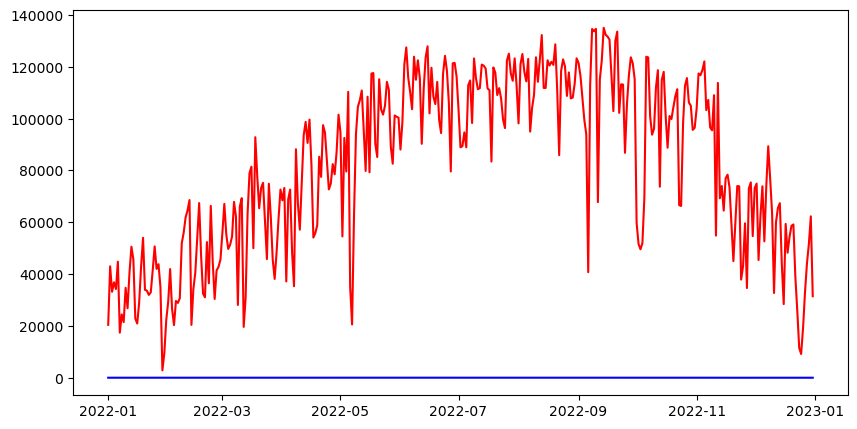

In [24]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")
ax.plot(df_temp['avgTemp'], color = 'blue')

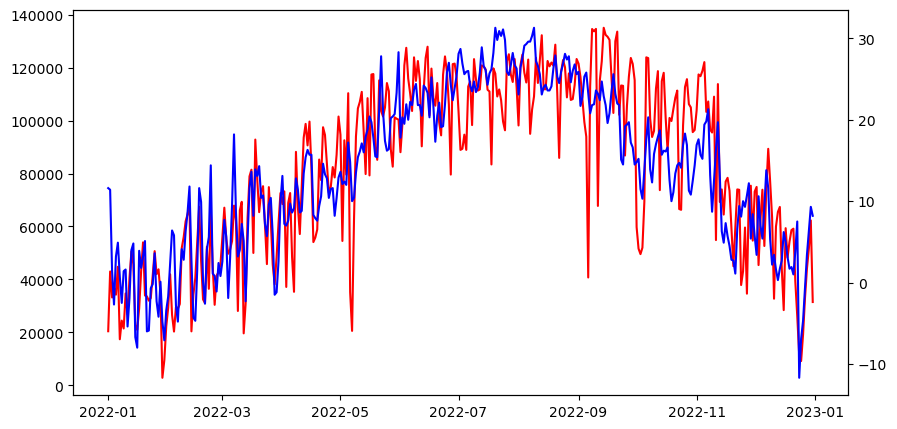

In [25]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

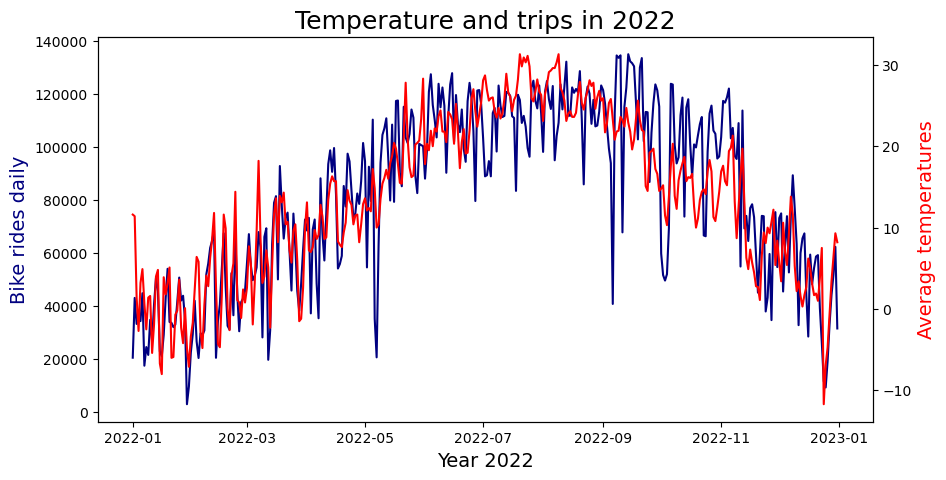

In [26]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [27]:
plt.style.use('ggplot')

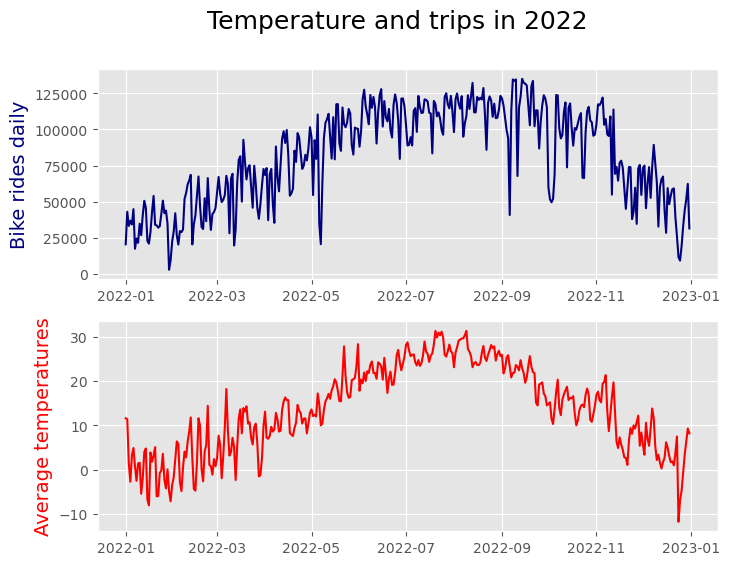

In [28]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

#### I used the object-oriented paradigm of Matplotlib, which involves creating figure and axis objects using plt.subplots(). This method allows for more control, such as adding a secondary y-axis with twinx() for dual-axis plots, enabling the visualization of two different variables (e.g., bike trips and temperature) on the same chart.

In [30]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
